# Проект: GoFast

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

<b>Цель иследования:</b>
1.Проанализировать общие данные о пользователях, их поездках и подписках.
2.Провести исследовательский анализ данных, чтобы выявить основные характеристики и тенденции.
3.Проверить несколько гипотез, касающихся поведения пользователей и выручки компании.
4.Сделать выводы и рекомендации для повышения эффективности бизнеса и увеличения количества подписчиков.

<b>Ход иследования:</b>
Данные я получу из файла с данными с помощью библиотеки pandas и сохраню их в датафреймы:

Пользователи — users_go.csv

Поездки — rides_go.csv

Подписки — subscriptions_go.csv

Я проверю данные на ошибки, поиск и удаление всех различных ошибок, которые не должны повлиять на конечный результат. В проект войдет семь шагов. 

1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Объединение данных
5. Подсчёт выручки
6. Проверка гипотез
7. Распределения


In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from scipy import stats

#### Шаг 1. Загрузка данных

In [5]:
users_df = pd.read_csv('../MyProject/users_go.csv')
rides_df = pd.read_csv('../MyProject/rides_go.csv')
subscriptions_df = pd.read_csv('../MyProject/subscriptions_go.csv')

In [6]:
display(users_df.head())

display(rides_df.head())

display(subscriptions_df.head())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [7]:
print("Информация о users_df:")
print(users_df.info())

print("\nИнформация о rides_df:")
print(rides_df.info())

print("\nИнформация о subscriptions_df:")
print(subscriptions_df.info())

Информация о users_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None

Информация о rides_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None

Информация о subscriptions_df:
<class 'pandas.core

#### Промежуточный вывод:

users_df:

Количество записей: 1565.
    
Столбцы: user_id, name, age, city, subscription_type.
    
Все значения в столбцах заполнены.

rides_df:
    
Количество записей: 18068.
    
Столбцы: user_id, distance, duration, date, month.
    
Все значения в столбцах заполнены.

subscriptions_df:
    
Количество записей: 2.
    
Столбцы: subscription_type, minute_price, start_ride_price, subscription_fee.
    
Все значения в столбцах заполнены</div>

#### Шаг 2. Предобработка данных

Приведение столбца date к типу даты pandas:

In [8]:
rides_df['date'] = pd.to_datetime(rides_df['date'])

In [9]:
min_date = rides_df['date'].min()
max_date = rides_df['date'].max()
print(f"Данные за период: {min_date} - {max_date}")

Данные за период: 2021-01-01 00:00:00 - 2021-12-30 00:00:00


Проверяем анамолии

In [10]:
duration_description = rides_df['duration'].describe()
print(duration_description)

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64


Чтобы не было путаницы с месяцами разных лет

In [11]:
rides_df['month'] = rides_df['date'].dt.month

rides_df['year'] = rides_df['date'].dt.year

unique_years = rides_df['year'].unique()
unique_months = rides_df['month'].unique()

print(f"Уникальный год: {unique_years}")
print(f"Уникальные месяцы: {unique_months}")

Уникальный год: [2021]
Уникальные месяцы: [ 1  4  8 10 11 12  3  6  7  2  5  9]


Проверка наличия пропущенных значений и дубликатов:

In [12]:
print(users_df.isnull().sum())

print(rides_df.isnull().sum())

print(subscriptions_df.isnull().sum())

print("\nДубликаты в users_df:", users_df.duplicated().sum())
print("Дубликаты в rides_df:", rides_df.duplicated().sum())
print("Дубликаты в subscriptions_df:", subscriptions_df.duplicated().sum())

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64
user_id     0
distance    0
duration    0
date        0
month       0
year        0
dtype: int64
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Дубликаты в users_df: 31
Дубликаты в rides_df: 0
Дубликаты в subscriptions_df: 0


Удаление дубликатов:

In [13]:
users_df = users_df.drop_duplicates()

In [14]:
print("Дубликаты в users_df:", users_df.duplicated().sum())

Дубликаты в users_df: 0


In [15]:
print("\nОценка качества данных:")
print("Пользователи:") 
display(users_df.describe())
print("\nПоездки:") 
display(rides_df.describe())
print("\nПодписки:") 
display(subscriptions_df.describe())


Оценка качества данных:
Пользователи:


,user_id,age
count,1534.000000,1534.000000
mean,767.500000,24.903520
std,442.971971,4.572367
min,1.000000,12.000000
25%,384.250000,22.000000
50%,767.500000,25.000000
75%,1150.750000,28.000000
max,1534.000000,43.000000



Поездки:


,user_id,distance,duration,date,month,year
count,18068.000000,18068.000000,18068.000000,18068,18068.000000,18068.0
mean,842.869936,3070.659976,17.805011,2021-06-30 19:47:21.266327296,6.486772,2021.0
min,1.000000,0.855683,0.500000,2021-01-01 00:00:00,1.000000,2021.0
25%,487.000000,2543.226360,13.597563,2021-04-02 00:00:00,4.000000,2021.0
50%,889.000000,3133.609994,17.678395,2021-06-30 00:00:00,6.000000,2021.0
75%,1213.250000,3776.222735,21.724800,2021-09-28 00:00:00,9.000000,2021.0
max,1534.000000,7211.007745,40.823963,2021-12-30 00:00:00,12.000000,2021.0
std,434.734317,1116.831209,6.091051,NaN,3.437410,0.0



Подписки:


,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


#### Промежуточный вывод:

1. В данных отсутствуют пропущенные значения.
    
2. Дубликаты в данных пользователей были обнаружены и успешно удалены.
    
3. Данные о поездках и подписках не содержат дубликатов.
    
4. Данные охватывают период с 2021-01-01 по 2021-12-30 и содержат информацию о всех месяцах 2021 года.</div>

#### Шаг 3. Исследовательский анализ данных

 Частота встречаемости городов:

In [16]:
city_counts = users_df['city'].value_counts()
print(city_counts)

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64


Визуализация:

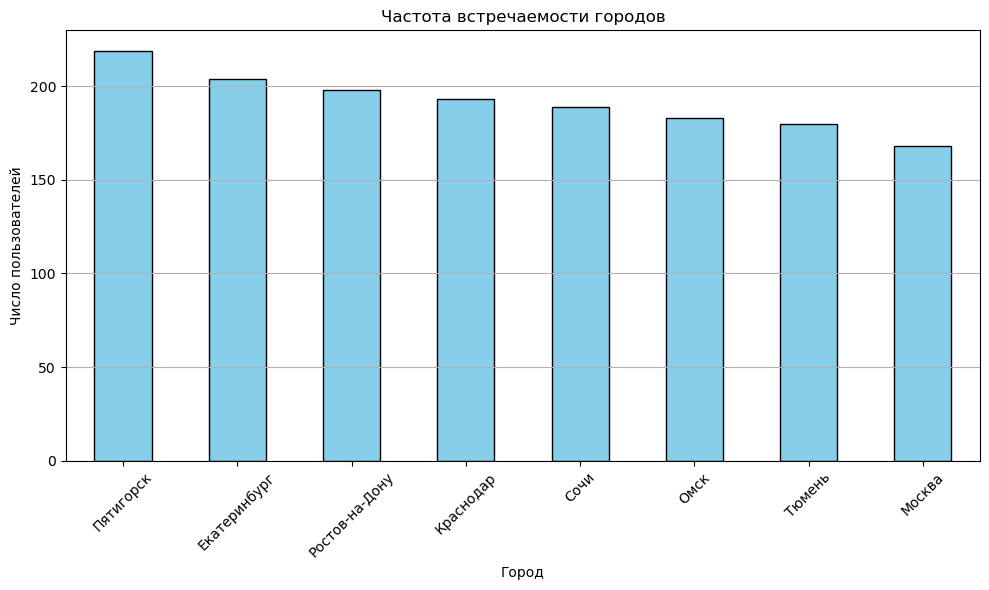

In [17]:
plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Частота встречаемости городов')
plt.xlabel('Город')
plt.ylabel('Число пользователей')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Соотношение пользователей с подпиской и без подписки:

In [18]:
subscription_counts = users_df['subscription_type'].value_counts(normalize=True) * 100
print(subscription_counts)

subscription_type
free     54.432855
ultra    45.567145
Name: proportion, dtype: float64


Визуализация:

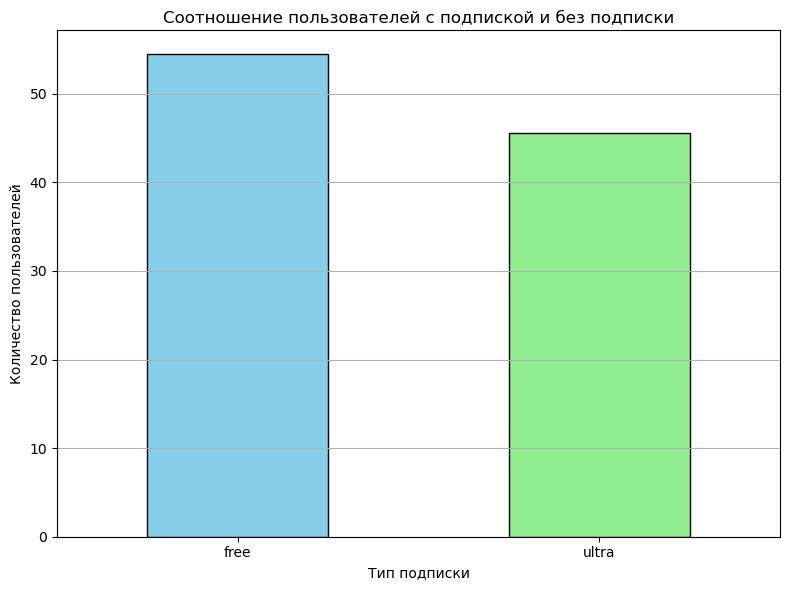

In [19]:
plt.figure(figsize=(8, 6))
subscription_counts.plot(kind='bar', color=['skyblue', 'lightgreen'], edgecolor='black')
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.xlabel('Тип подписки')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Промежуточный вывод:

Распределение пользователей: Большинство пользователей (54.06%) используют бесплатную версию сервиса, тогда как 45.94% пользуются платной подпиской "ultra".

Возраст пользователей:

In [20]:
age_summary = users_df['age'].describe()
print(age_summary)

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64


Визуализация:

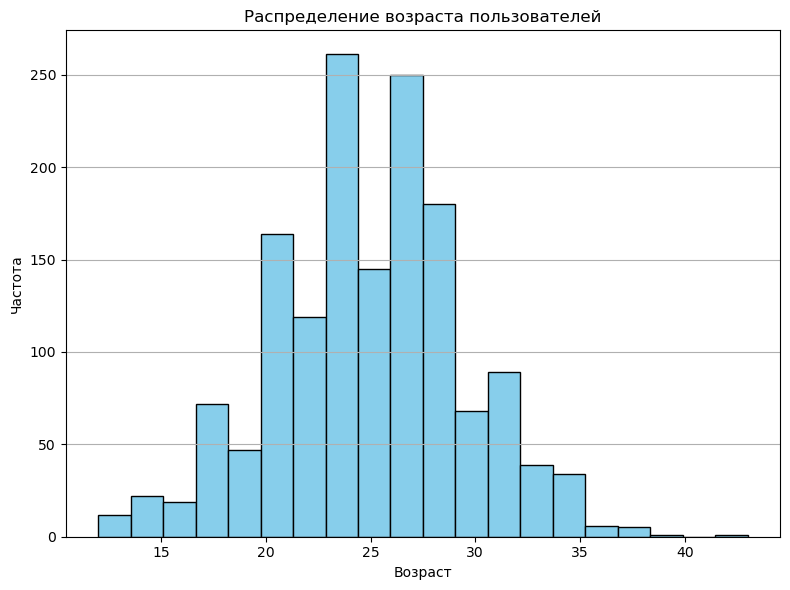

In [21]:
plt.figure(figsize=(8, 6))
plt.hist(users_df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Расстояние и продолжительность поездок:

In [22]:
distance_summary = rides_df['distance'].describe()
duration_summary = rides_df['duration'].describe()

print(distance_summary)

print(duration_summary)

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64
count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64


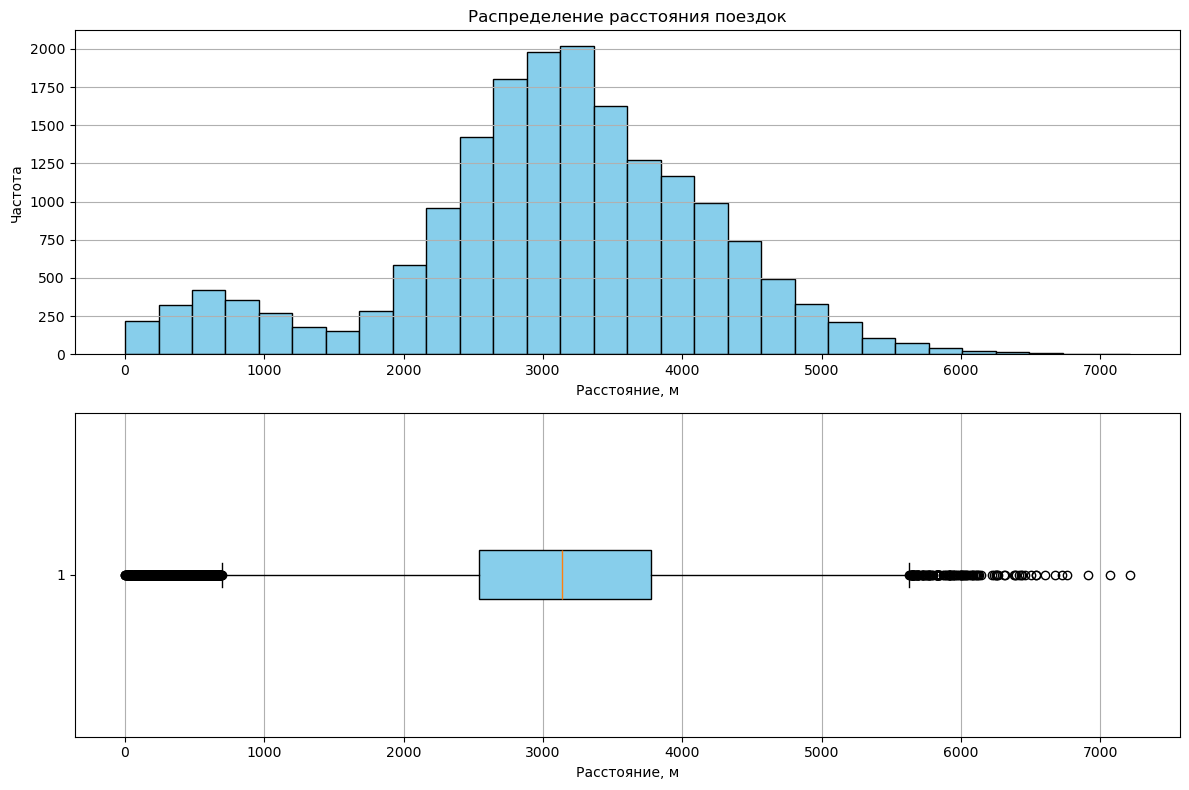

In [23]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.hist(rides_df['distance'], bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение расстояния поездок')
plt.xlabel('Расстояние, м')
plt.ylabel('Частота')
plt.grid(axis='y')

plt.subplot(2, 1, 2)
plt.boxplot(rides_df['distance'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'))
plt.xlabel('Расстояние, м')
plt.grid(axis='x')

plt.tight_layout()
plt.show()

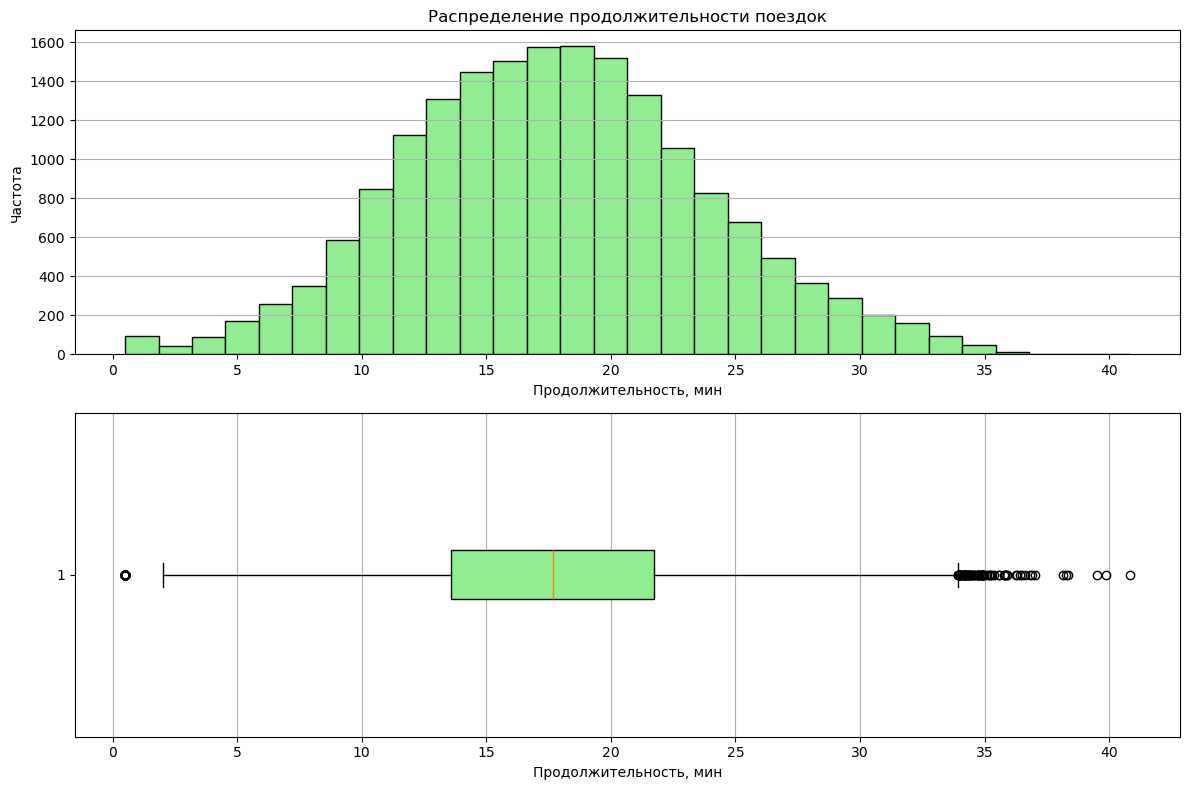

In [24]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.hist(rides_df['duration'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Распределение продолжительности поездок')
plt.xlabel('Продолжительность, мин')
plt.ylabel('Частота')
plt.grid(axis='y')

plt.subplot(2, 1, 2)
plt.boxplot(rides_df['duration'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen', color='black'))
plt.xlabel('Продолжительность, мин')
plt.grid(axis='x')

plt.tight_layout()
plt.show()

#### Шаг 4. Объединение данных

Объединение данных о пользователях и поездках

In [25]:
merged_df = pd.merge(users_df, rides_df, on='user_id', how='left')

Проверка коррекктности размерности

In [26]:
print(merged_df.shape)

(18068, 10)


Объединение с данными о подписках

In [27]:
merged_df = pd.merge(merged_df, subscriptions_df, on='subscription_type', how='left')

Проверка коррекктности размерности

In [28]:
print(merged_df.shape)

(18068, 13)


In [29]:
display(merged_df.head())

,user_id,name,age,city,subscription_type,distance,duration,date,month,year,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,2021,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,2021,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,2021,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,2021,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,2021,6,0,199


Датафрейм с данными о пользователях без подписки

In [30]:
no_subscription_df = merged_df[merged_df['subscription_type'] == 'free']

Датафрейм с данными о пользователях с подпиской

In [31]:
with_subscription_df = merged_df[merged_df['subscription_type'] == 'ultra']

In [32]:
print(f"Количество пользователей без подписки: {len(no_subscription_df)}")
print(f"Количество пользователей с подпиской: {len(with_subscription_df)}")

Количество пользователей без подписки: 11568
Количество пользователей с подпиской: 6500


Визуализация:

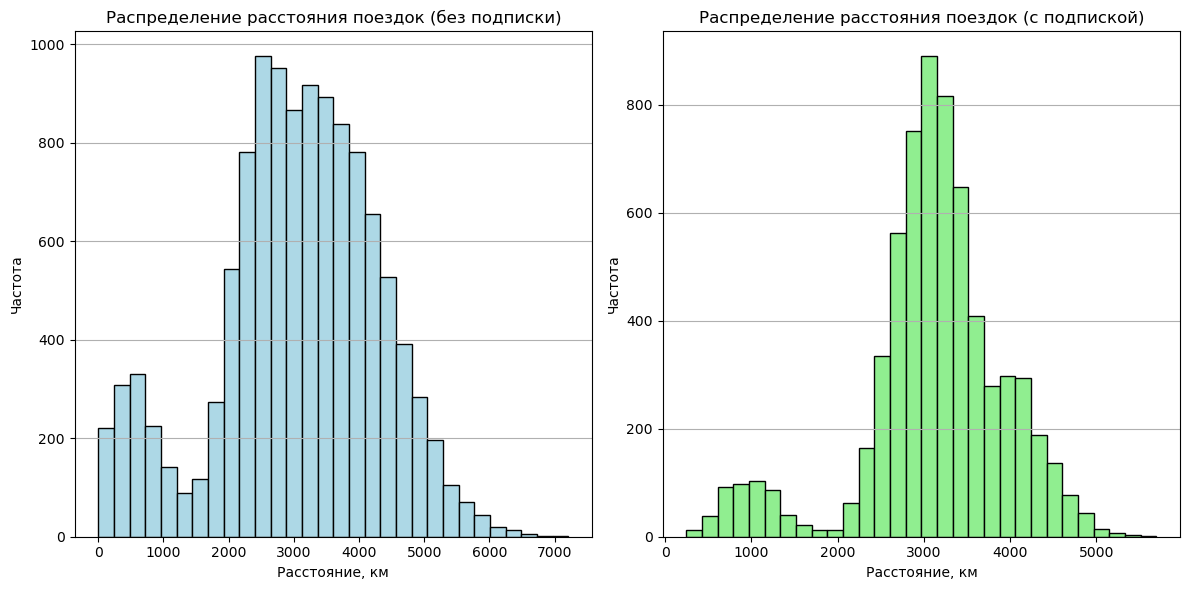

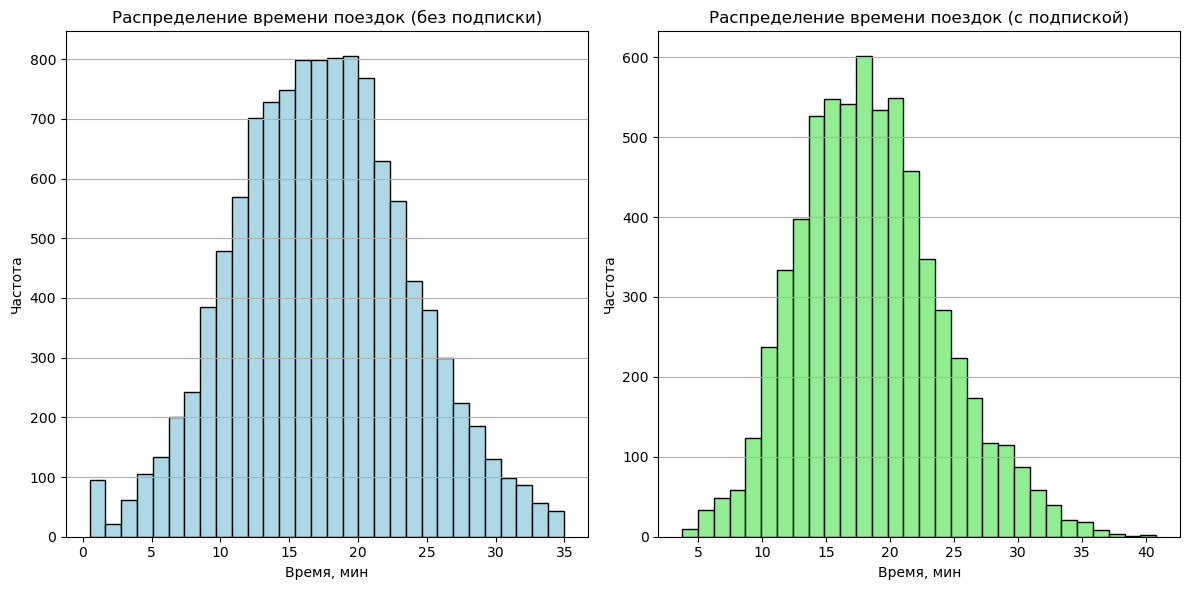

In [33]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(no_subscription_df['distance'], bins=30, color='lightblue', edgecolor='black')
plt.title('Распределение расстояния поездок (без подписки)')
plt.xlabel('Расстояние, км')
plt.ylabel('Частота')
plt.grid(axis='y')

plt.subplot(1, 2, 2)
plt.hist(with_subscription_df['distance'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Распределение расстояния поездок (с подпиской)')
plt.xlabel('Расстояние, км')
plt.ylabel('Частота')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(no_subscription_df['duration'], bins=30, color='lightblue', edgecolor='black')
plt.title('Распределение времени поездок (без подписки)')
plt.xlabel('Время, мин')
plt.ylabel('Частота')
plt.grid(axis='y')

plt.subplot(1, 2, 2)
plt.hist(with_subscription_df['duration'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Распределение времени поездок (с подпиской)')
plt.xlabel('Время, мин')
plt.ylabel('Частота')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

<b>1. Распределение расстояния поездок (без подписки)</b>

* Описание графика:

* Ось X: Расстояние поездок в километрах.

* Ось Y: Частота (количество поездок).

* График: Гистограмма с 30 интервалами, которая показывает, как часто происходят поездки на определенное расстояние для пользователей без подписки.

* Особенности: Виден пик в определенной области, что говорит о наиболее распространенном расстоянии поездок среди пользователей без подписки. 

* График позволяет увидеть, распределены ли расстояния равномерно или есть выраженные пики и спады.

<b>2. Распределение расстояния поездок (с подпиской)</b>

* Описание графика:
* Ось X: Расстояние поездок в километрах.
* Ось Y: Частота (количество поездок).
* График: Гистограмма с 30 интервалами, показывающая частоту поездок на определенное расстояние для пользователей с подпиской.
* Особенности: Показаны различия в паттернах поездок между пользователями с подпиской и без. Пики и спады на графике указывают на наиболее популярные расстояния для пользователей с подпиской.

<b>3. Распределение времени поездок (без подписки)</b>

* Описание графика:
* Ось X: Время поездок в минутах.
* Ось Y: Частота (количество поездок).
* График: Гистограмма с 30 интервалами, показывающая частоту поездок разной продолжительности для пользователей без подписки.
* Особенности: Определяются наиболее распространенные длительности поездок. Виден пик, указывающий на среднее время поездок среди этой группы пользователей.

<b>4. Распределение времени поездок (с подпиской)</b>

* Описание графика:
* Ось X: Время поездок в минутах.
* Ось Y: Частота (количество поездок).
* График: Гистограмма с 30 интервалами, показывающая частоту поездок разной продолжительности для пользователей с подпиской.
* Особенности: Показаны различия во времени поездок между пользователями с подпиской и без. Пики и спады на графике указывают на наиболее популярные длительности для пользователей с подпиской.

#### Промежуточный вывод:

* Сравнение расстояний: Анализируя два графика распределения расстояний, можно определить, отличается ли поведение пользователей с подпиской и без в плане средних расстояний поездок. Важно отметить, где расположены пики и как распределены данные.
* Сравнение времени: Аналогично для времени поездок, можно увидеть, как отличаются продолжительности поездок между двумя группами пользователей.
* Общие тенденции: Наличие подписки может влиять на предпочтения и привычки пользователей, что важно учитывать при анализе данных и разработке стратегий маркетинга или улучшения сервиса.

#### Шаг 5. Подсчёт выручки

Округление времени:

In [41]:
merged_df['duration'] = np.ceil(merged_df['duration'])

In [42]:
aggregated_df = merged_df.groupby(['user_id', 'month', 'subscription_type']).agg({
    'distance': 'sum',
    'duration': 'sum',
    'user_id': 'count'
}).rename(columns={'user_id': 'ride_count'}).reset_index()

def calculate_monthly_revenue(row):
    if row['subscription_type'] == 'ultra':
        start_cost = 0
        minute_cost = row['minute_price']
        subscription_fee = row['subscription_fee']
    else:
        start_cost = row['start_ride_price']
        minute_cost = row['minute_price']
        subscription_fee = 0

    total_duration_minutes = row['duration']
    ride_count = row['ride_count']
    revenue = start_cost * ride_count + total_duration_minutes * minute_cost + subscription_fee
    
    return revenue

aggregated_df = aggregated_df.merge(subscriptions_df, on='subscription_type', how='left')

Добавление столбца с помесячной выручкой:

In [43]:
aggregated_df['monthly_revenue'] = aggregated_df.apply(calculate_monthly_revenue, axis=1)

Агрегированные данные о поездках и выручке:

In [37]:
display(aggregated_df.head())

,user_id,month,subscription_type,distance,duration,ride_count,minute_price,start_ride_price,subscription_fee,monthly_revenue
0,1,1,ultra,7027.511294,42.0,2,6,0,199,451.0
1,1,4,ultra,754.159807,7.0,1,6,0,199,241.0
2,1,8,ultra,6723.470560,46.0,2,6,0,199,475.0
3,1,10,ultra,5809.911100,32.0,2,6,0,199,391.0
4,1,11,ultra,7003.499363,56.0,3,6,0,199,535.0


#### Шаг 6. Проверка гипотез

* Нулевая гипотеза (H₀): Среднее время поездок для пользователей с подпиской не больше, чем для пользователей без подписки.
* Альтернативная гипотеза (H₁): Среднее время поездок для пользователей с подпиской больше, чем для пользователей без подписки.

In [38]:
no_subscription_durations = merged_df[merged_df['subscription_type'] == 'free']['duration']
subscription_durations = merged_df[merged_df['subscription_type'] == 'ultra']['duration']
t_stat, p_value = stats.ttest_ind(subscription_durations, no_subscription_durations, equal_var=False, alternative='greater')
print(f"T-статистика: {t_stat}, p-значение: {p_value}")

T-статистика: 12.624854943926593, p-значение: 1.1814679253701353e-36


* Нулевая гипотеза (H₀): Среднее расстояние поездок для пользователей с подпиской не больше 3130.
* Альтернативная гипотеза (H₁): Среднее расстояние поездок для пользователей с подпиской больше 3130.

In [39]:
subscription_distances = merged_df[merged_df['subscription_type'] == 'ultra']['distance']
mean_distance = 3130

z_score, p_value = stats.ttest_1samp(subscription_distances, mean_distance, alternative='greater')
print(f"Z-статистика: {z_score}, p-значение: {p_value}")

Z-статистика: -1.402123166869486, p-значение: 0.9195368847849785


* Нулевая гипотеза (H₀): Средняя месячная выручка от пользователей с подпиской не больше, чем от пользователей без подписки.
* Альтернативная гипотеза (H₁): Средняя месячная выручка от пользователей с подпиской больше, чем от пользователей без подписки.

In [40]:
revenue_no_subscription = aggregated_df[aggregated_df['subscription_type'] == 'free']['monthly_revenue']
revenue_subscription = aggregated_df[aggregated_df['subscription_type'] == 'ultra']['monthly_revenue']

t_stat, p_value = stats.ttest_ind(revenue_subscription, revenue_no_subscription, equal_var=False, alternative='greater')
print(f"T-статистика: {t_stat}, p-значение: {p_value}")

T-статистика: 13.201754888325674, p-значение: 8.874140893976874e-40


<b>Вывод по гипотезам:</b>

1. Среднее время поездок для пользователей с подпиской и без подписки

* <b>Вывод:</b> p-значение значительно меньше уровня значимости (обычно 0.05), что позволяет отвергнуть нулевую гипотезу в пользу альтернативной. Таким образом, можно утверждать, что среднее время поездок для пользователей с подпиской больше, чем для пользователей без подписки.

2. Среднее расстояние поездок для пользователей с подпиской
    
* <b>Вывод:</b> p-значение значительно больше уровня значимости (обычно 0.05), что не позволяет отвергнуть нулевую гипотезу. Таким образом, нет оснований утверждать, что среднее расстояние поездок для пользователей с подпиской больше 3130.

3. Средняя месячная выручка от пользователей с подпиской и без подписки

* <b>Вывод:</b> p-значение значительно меньше уровня значимости (обычно 0.05), что позволяет отвергнуть нулевую гипотезу в пользу альтернативной. Таким образом, можно утверждать, что средняя месячная выручка от пользователей с подпиской больше, чем от пользователей без подписки.

<b>Рекомендации:</b>

1. Стимулировать использование подписок: Учитывая значимую разницу во времени поездок между пользователями с подпиской и без неё, компания может активнее продвигать свои подписочные предложения. Это может включать скидки на подписки, предложения бонусов или удобства для подписчиков.

2. Оптимизировать ценообразование для расстояний: Хотя среднее расстояние поездок для пользователей с подпиской не отличается от заданного значения (3130), можно провести дополнительные исследования, чтобы понять, какие факторы влияют на предпочтения пользователей. Возможно, стоит разработать гибкие тарифные планы или дополнительные услуги для удовлетворения разнообразных потребностей клиентов.

3. Максимизировать выручку с подписчиков: Так как выручка от пользователей с подпиской значительно выше, чем от пользователей без подписки, компания может сосредоточить усилия на удержании подписчиков и стимулировании их к повышенному использованию услуг. Это может включать персонализированные предложения, улучшенный сервис или дополнительные возможности доступа.

4. Каждая из этих рекомендаций направлена на оптимизацию бизнес-процессов и увеличение общей прибыли компании за счёт более эффективного использования данных о поведении клиентов.